# Homework 5

In this homework you will explore objective functions for generalized linear classification models and explore the kNN algorithm. The assignment will make use of built-in example datasets from `scikit-learn`. We will start with some standard imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from numpy import ma

### Problem 1 (15 points)

Using the "blobs" dataset of 2 classes as a function of 2 input variables below and plot the value of the support vector machine (i.e. margin max cost) objective function as a function of the model parameters $\beta_1$ and $\beta_2$. You can assume that the intercept, $\beta_0$, is fixed at a value of 3.0. The result should be a contour plot as shown below.

Please plot the range: $\beta_1 \in [0, 10], \beta_2 \in [-10, 0]$, and please plot the contours in log scale

* Please refer matplotlib website for contour plot example: 
https://matplotlib.org/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py

* and log-scale contours:
https://matplotlib.org/gallery/images_contours_and_fields/contourf_log.html

* consider the following code for log-scale contour plot: `CS = ax.contourf(beta1_v, beta2_v, cost_p1, locator=ticker.LogLocator())`


Note: you are not solving/optimizing here, just plotting the value of the objective as a function of the model parameters.

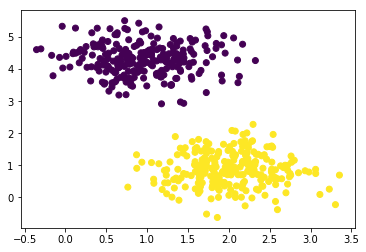

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=0.5,random_state=0)

#rescale
y_new = []
for yi in y:
    if yi == 0:
        y_new.append(-1)
    else:
        y_new.append(1)
y = np.array(y_new).reshape(y.shape)

fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=y)
plt.show()

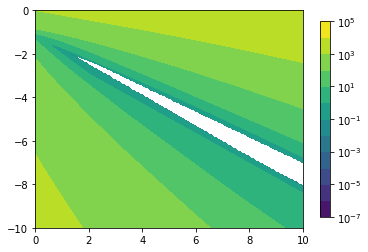

In [4]:
beta0 = 3.0
beta1 = np.linspace(0., 10., 200)
beta2 = np.linspace(-10., 0., 200)
beta1_v, beta2_v = np.meshgrid(beta1, beta2)



### Problem 2 (10 points)

Add an $L_2$ penalty to the objective function with a regularization strength, $\lambda$, of 10 and plot the value of the regularized objective as a function of $\beta_1$ and $\beta_2$. You can assume that the intercept, $\beta_0$, is fixed at a value of 3.0.

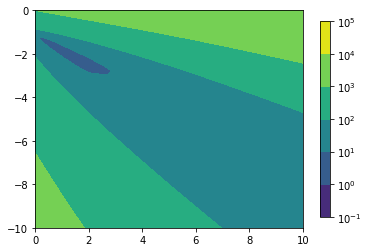

### Problem 3 (15 points)

Use `scipy.minimize` to minimize both objective functions (max cost and $L_2$-regularized max cost) with respect to all parameters $\vec{\beta}$. Plot the resulting decision boundary for both results on the scatter plot of the data. 

In [6]:
from scipy.optimize import minimize


[ 7.29643192  1.42196539 -4.0699233 ]


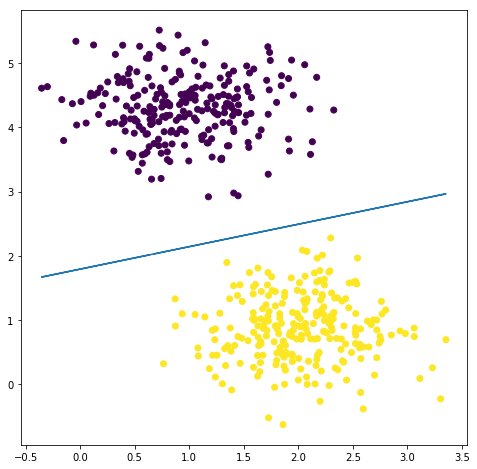

[ 1.55180154  1.25836773 -1.45264518]


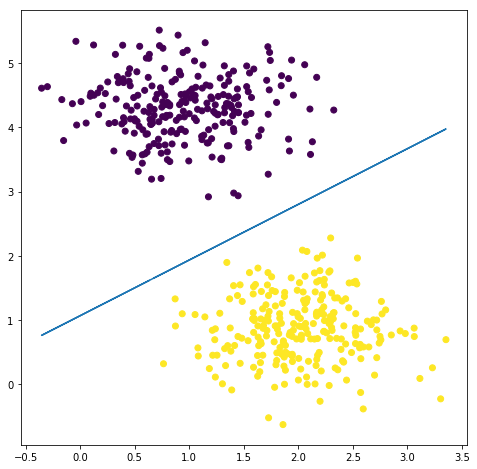

### Problem 4 (15 points)

Write an implementation of the kNN algorithm. You may use existing code from the lectures, and you do not need to deal with tie breakers.

Use the "moons" dataset below to train the kNN algorithm, then predict the values of the `grid_x1x2` variables. Compare the results for 1, 5, and 10 nearest neighbors.

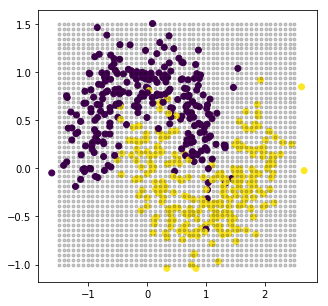

In [9]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.25)

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0],X[:,1], c=y)

x1 = np.linspace(-1.5, 2.5, 50)
x2 = np.linspace(-1, 1.5, 50)
x1x1, x2x2 = np.meshgrid(x1, x2)
grid_x1x2 = np.array(list(zip(x1x1.ravel(), x2x2.ravel())))
ax.scatter(grid_x1x2[:,0], grid_x1x2[:,1],c='k',alpha=0.2, marker='.')

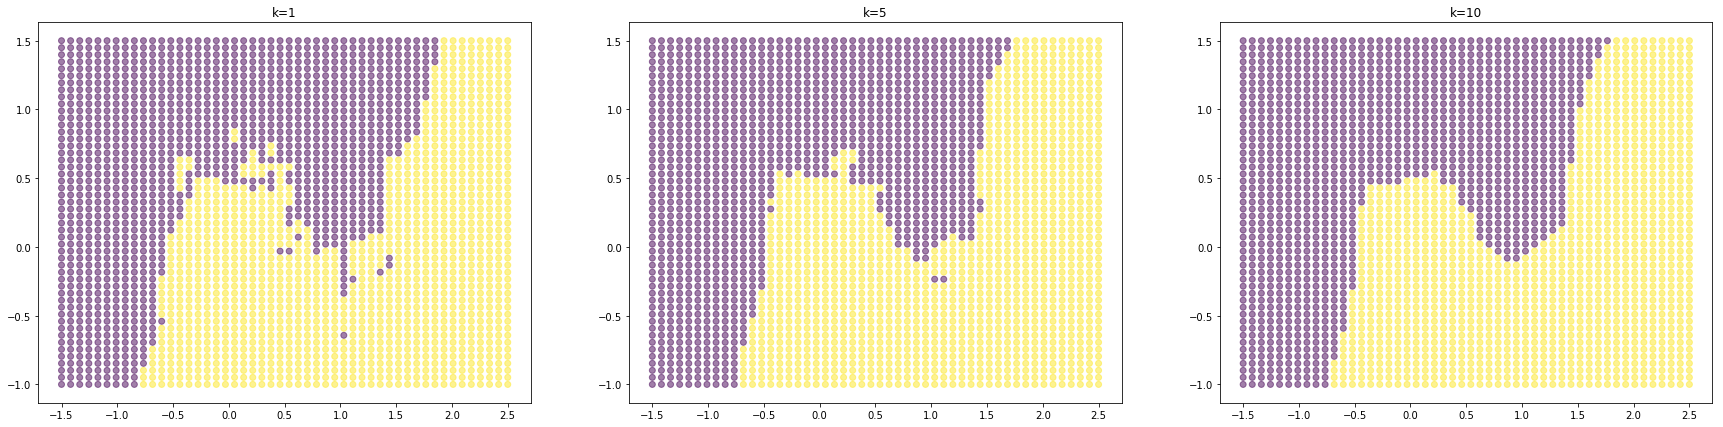

### Problem 5

Use the `scikit-learn` implementation of a kernel SVM with an `rbf` (Gaussian) kernel with `gamma` of 0.1 along with the `plot_svc_decision_function` provided below to visualize the decision boundary of the "moons" dataset with the following values for the margin "hardness", `C`: 1e-3, 1, 1e3, 1e10.

Note: this is nearly identical to the exercise in the classification lecture.

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='k');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

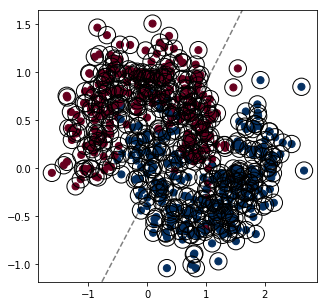

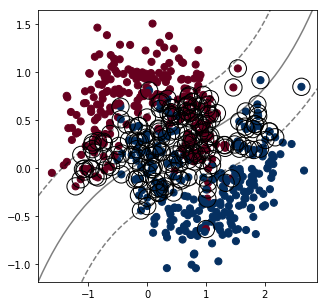

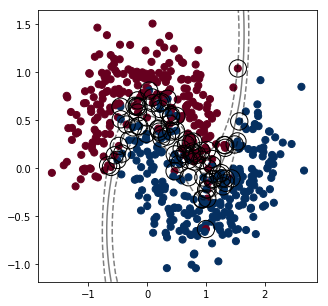

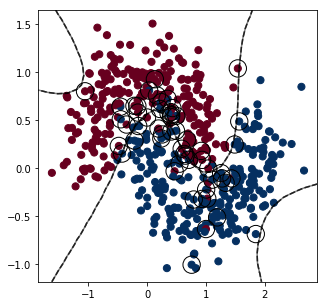